In [262]:
#Trabalhando com planilhas excel
import pandas as pd


In [263]:
#atribuido cada planilha a uma variavel vamos fazer o tratamento dos dados
aju = pd.read_excel("datasets/Aracaju.xlsx")
nat = pd.read_excel("datasets/Natal.xlsx")
rfe = pd.read_excel("datasets/Recife.xlsx")
fot = pd.read_excel("datasets/Fortaleza.xlsx")
ssa = pd.read_excel("datasets/Salvador.xlsx")

In [264]:
#exibindo o head para verificar se é possivel juntar os os dfs em um unico
aju.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [265]:
vendas = pd.concat([aju, nat, rfe, fot, ssa])

In [266]:
vendas["Vendas"].mean()

122.61180089485458

In [267]:
#é possivel exibir uma amostra dos dados
#isso pode ser util para verificar se a junção deu certo
vendas.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
134,Fortaleza,2019-03-02,195.18,980,5
62,Salvador,2019-01-01,161.02,1037,3
95,Aracaju,2018-01-01,127.43,1522,9
39,Salvador,2019-01-01,165.95,1036,3
113,Natal,2019-01-02,18.90,1034,3


In [268]:
#verificando o tipo de arquivo em cada coluna do nosso df
vendas.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [269]:
#transformando a coluna LojaID no tipo object ja que estao nao sera utilizado como calculo
vendas["LojaID"] = vendas["LojaID"].astype("object")

In [270]:
#verificando valores faltantes (nulos)

vendas.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

Não se aplica ao caso, mas caso hovessem valores nulos na ultima verificação utilizariamos o comando:

vendas["Vendas"].fillna(vendas["Vendas"].mean(), inplace=True)

implica que no df vendas, na coluna Vendas os valores nulos serão preenchidos com a media dos valores e modificando a informação tambem na memoria, nao apenas na linha de comando

podemos tambem utilizar no lugar de vendas["Vendas"].mean() 
substituir por 0 
apagar as linhas nulas

vendas.dropna(inplace=True) para todas as linhas nulas no df
Se for necessario espeficicar colunas usamos o 

vendas.dropna(subset=["Vendas"], inplace= True)

Para remover linhas onde todos os valores em todas as tabelas estejam faltantes, usamos

vendas.dropna(how="all", inplace=True)

In [271]:
#criano novas colunas do df

vendas["Receita"] = vendas["Vendas"].mul(vendas["Qtde"])

Caso seja adicionado acidentalmente uma coluna podemos remove-la utilizando o metodo .drop e passar o nome da coluna como mostra abaixo. É importante passar o parametro inplace para que os dados persistam em memoria

In [272]:
#vendas.drop(columns=['Receitas'], inplace=True)
vendas.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [273]:
#O mair valor em receita
vendas["Receita"].max()

3544.0

In [274]:
#O menor valor em receita
vendas["Receita"].min()

3.34

In [275]:
#Quais foram as 3 melhores lojas e suas respectivas receitas
vendas.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [276]:
#Quais foram as piores
vendas.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57


In [277]:
#agrupando as receitas por cidade
vendas.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [278]:
#Exibindo os dados de forma ordenada
vendas.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
10,Natal,2018-10-27,828.0,852,4,3312.0
38,Natal,2018-02-25,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


>>> TRABALHANDO COM DATAS <<<

In [279]:
#passando a coluna data da o formatao date time
vendas["Data"] = pd.to_datetime(vendas["Data"])

In [280]:
vendas.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [281]:
#exibindo a receita anual
vendas.groupby(vendas["Data"].dt.year)["Receita"].sum()
#mostra a superavit nesse caso para as vendas

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [282]:
vendas["Ano_venda"] = vendas["Data"].dt.year

In [283]:
vendas.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_venda
102,Aracaju,2018-01-01,7.29,1523,1,7.29,2018
41,Recife,2019-02-13,157.78,981,4,631.12,2019
51,Fortaleza,2019-01-01,30.47,1005,3,91.41,2019
135,Fortaleza,2019-03-02,10.79,983,5,53.95,2019
26,Natal,2018-07-20,370.00,853,3,1110.00,2018


In [284]:
#extraindo o mes e o dia da venda
vendas["mes_venda"], vendas["dia_venda"] = (vendas["Data"].dt.month, vendas["Data"].dt.day)

In [285]:
vendas.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_venda,mes_venda,dia_venda
123,Natal,2019-01-02,127.45,1036,3,382.35,2019,1,2
182,Salvador,2019-01-02,6.60,1037,2,13.20,2019,1,2
9,Aracaju,2019-01-01,149.36,1523,3,448.08,2019,1,1
123,Fortaleza,2019-03-02,20.22,981,6,121.32,2019,3,2
209,Natal,2019-01-02,69.98,1034,2,139.96,2019,1,2


In [286]:
# Exibir a primeira data do df
vendas["Data"].min(), vendas["Data"].max()

(Timestamp('2018-01-01 00:00:00'), Timestamp('2019-04-05 00:00:00'))

In [287]:
#calculando a diferença entre a primeira data e data data do df
vendas["diferença_dias"] = vendas["Data"] - vendas["Data"].min()

In [288]:
vendas.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_venda,mes_venda,dia_venda,diferença_dias
154,Salvador,2019-01-02,9.58,1037,1,9.58,2019,1,2,366 days
163,Natal,2019-01-02,17.66,1036,3,52.98,2019,1,2,366 days
8,Recife,2019-02-11,56.47,980,6,338.82,2019,2,11,406 days
44,Natal,2019-01-03,500.00,852,4,2000.00,2019,1,3,367 days
14,Salvador,2019-01-12,109.01,1035,2,218.02,2019,1,12,376 days


In [289]:
#exibindo o trimestre
vendas["trimestre"] = vendas["Data"].dt.quarter

In [290]:
vendas.sample(15)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_venda,mes_venda,dia_venda,diferença_dias,trimestre
29,Salvador,2019-01-01,9.27,1034,1,9.27,2019,1,1,365 days,1
116,Natal,2019-01-02,41.78,1034,3,125.34,2019,1,2,366 days,1
114,Salvador,2019-03-02,25.52,1034,1,25.52,2019,3,2,425 days,1
130,Salvador,2019-03-02,59.78,1036,1,59.78,2019,3,2,425 days,1
52,Fortaleza,2019-01-01,15.22,1003,2,30.44,2019,1,1,365 days,1
226,Salvador,2019-01-02,38.32,1035,2,76.64,2019,1,2,366 days,1
67,Fortaleza,2019-01-01,43.51,1003,1,43.51,2019,1,1,365 days,1
48,Salvador,2019-01-01,127.28,1035,2,254.56,2019,1,1,365 days,1
91,Salvador,2019-01-01,17.74,1035,1,17.74,2019,1,1,365 days,1
209,Salvador,2019-01-02,69.98,1034,2,139.96,2019,1,2,366 days,1


In [291]:
#filtrando vendas 2019 no mes de março como exemplo
vendas_marco_19 = vendas.loc[(vendas["Data"].dt.year == 2019) & (vendas["Data"].dt.month == 3)]

In [292]:
#sera exibido todas as vendas de março de 2019
vendas_marco_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_venda,mes_venda,dia_venda,diferença_dias,trimestre
2,Natal,2019-03-11,308.00,852,3,924.00,2019,3,11,434 days,1
4,Natal,2019-03-09,699.00,853,3,2097.00,2019,3,9,432 days,1
5,Natal,2019-03-30,674.00,854,2,1348.00,2019,3,30,453 days,1
7,Natal,2019-03-18,886.00,853,4,3544.00,2019,3,18,441 days,1
8,Natal,2019-03-27,667.00,852,4,2668.00,2019,3,27,450 days,1
...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2019,3,2,425 days,1


>>> VIZUALIZAÇÃO DE DADOS <<<

In [293]:
#Exibir do maior para o menor quantas linhas temos em cada dado, loja no exemplo
vendas["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1002     30
1005     30
852      29
1523     29
854      28
1004     28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

<AxesSubplot: >

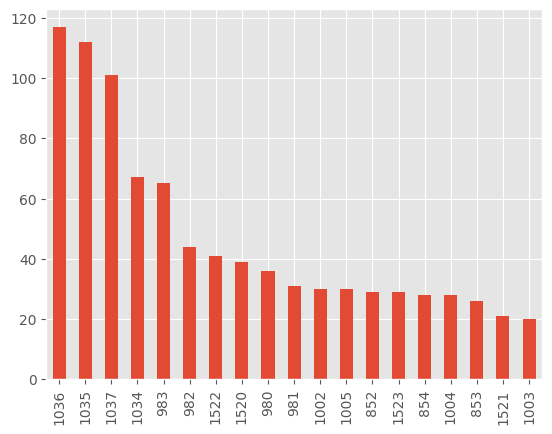

In [294]:
#grafico de barras
 
vendas["LojaID"].value_counts(ascending=False).plot.bar()

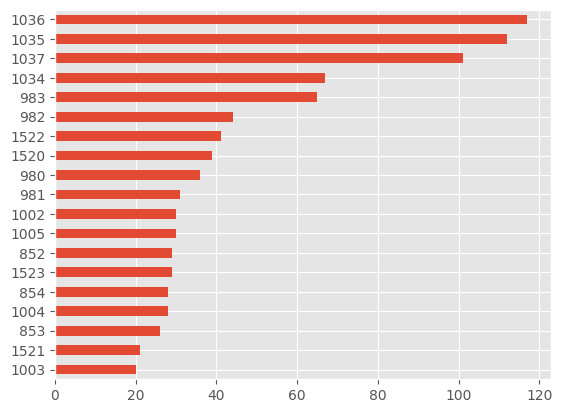

In [295]:
#barras horizontais
#*utilize o ; para nao exibir o a linha de informações sobre o grafico gerado
vendas["LojaID"].value_counts(ascending=True).plot.barh();

<AxesSubplot: ylabel='Receita'>

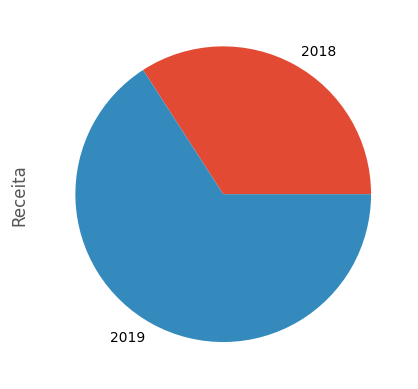

In [296]:
#agrupando as vendas por ano e exibindo em grafico de pizza
vendas.groupby(vendas["Data"].dt.year)["Receita"].sum().plot.pie()

In [297]:
vendas["Cidade"].value_counts()

Natal        240
Salvador     240
Recife       142
Fortaleza    142
Aracaju      130
Name: Cidade, dtype: int64

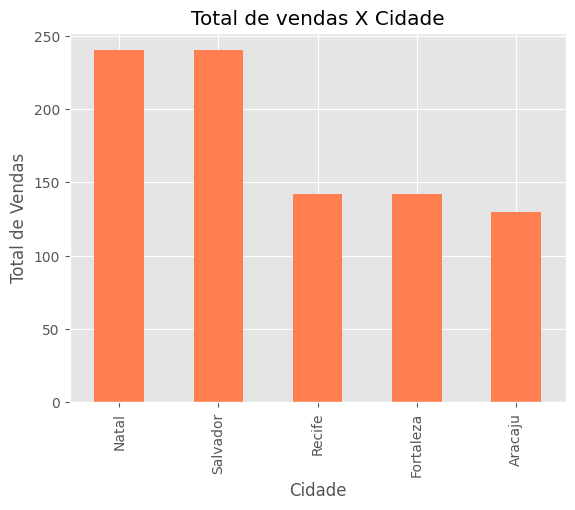

In [298]:
#adicionando titulo e nomeando os eixos do grafico
import matplotlib as plt
vendas["Cidade"].value_counts().plot.bar(title="Total de vendas X Cidade", color ="coral")
plt.pyplot.xlabel("Cidade")
plt.pyplot.ylabel("Total de Vendas");

In [299]:
#alterando estilo disponiveis no site do matplotlib
plt.style.use("ggplot")

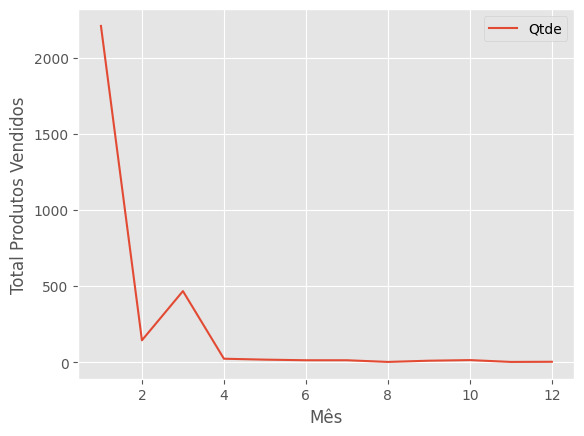

In [300]:
#criando novo grafico com o estilo
vendas.groupby(vendas["mes_venda"])["Qtde"].sum().plot()
plt.pyplot.xlabel("Mês")
plt.pyplot.ylabel("Total Produtos Vendidos")
plt.pyplot.legend();

In [301]:
vendas.groupby(vendas["mes_venda"])["Qtde"].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [302]:
#Selecionando apenas as vendas de 2019
#Inves de usar o loc setamos uma variavel com a coluna do ano das vendas de 2019
vendas_2019 = vendas[vendas["Ano_venda"]==2019]

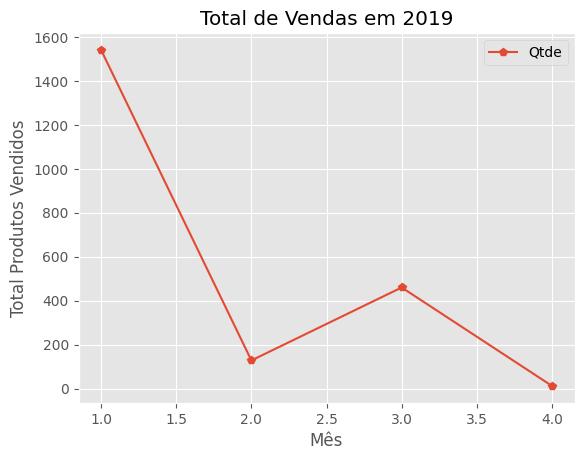

In [311]:
#Total produtos vendodos por mes
vendas_2019.groupby(vendas_2019["mes_venda"])["Qtde"].sum().plot(title="Total de Vendas em 2019", marker = "p")
plt.pyplot.xlabel("Mês")
plt.pyplot.ylabel("Total Produtos Vendidos")
plt.pyplot.legend();

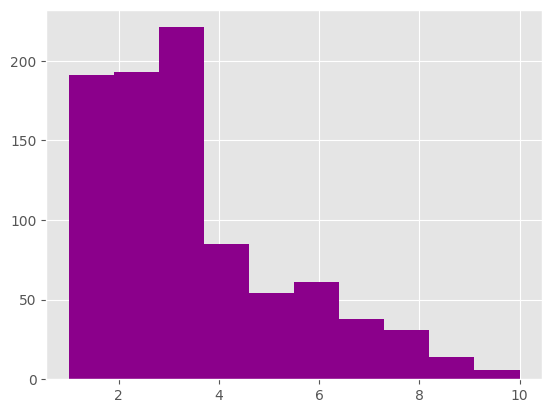

In [316]:
#grafico em formato de histograma

plt.pyplot.hist(vendas["Qtde"], color = "darkmagenta");

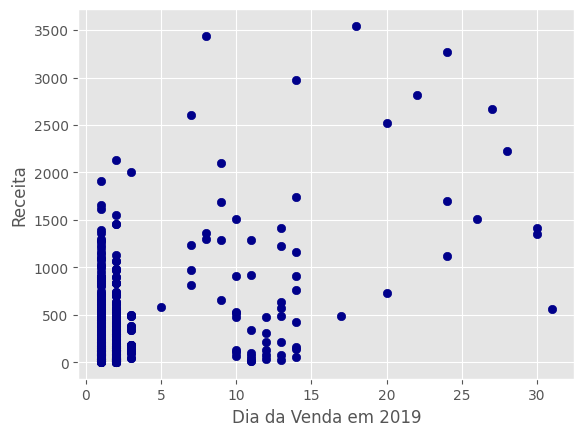

In [323]:
#dia em dos meses de 2019 onde ocorreram as vendas em gráfico de dispersão
plt.pyplot.scatter(x = vendas_2019["dia_venda"], y = vendas_2019["Receita"], color = "darkblue")
plt.pyplot.xlabel("Dia da Venda em 2019")
plt.pyplot.ylabel("Receita");

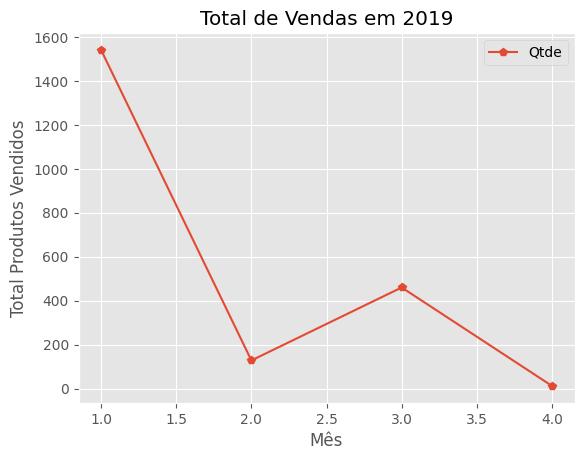

In [342]:
#Para salvar as imagens geradas dos graficos
vendas_2019.groupby(vendas_2019["mes_venda"])["Qtde"].sum().plot(title="Total de Vendas em 2019", marker = "p")
plt.pyplot.xlabel("Mês")
plt.pyplot.ylabel("Total Produtos Vendidos")
plt.pyplot.legend();
plt.pyplot.savefig("Grafico qtdexmes.tiff")